In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [64]:
corr_matrix = df.corr()
corr_matrix['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

<AxesSubplot:xlabel='target', ylabel='count'>

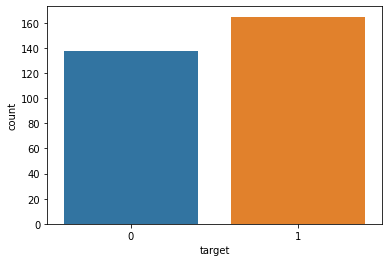

In [65]:
sns.countplot(x='target',data=df)

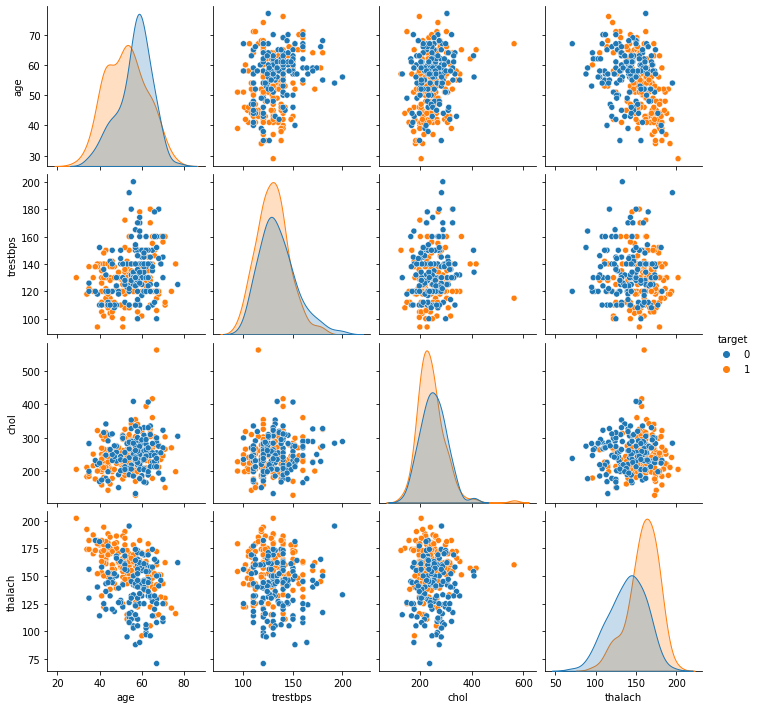

In [66]:
sns.pairplot(df[['age','trestbps','chol','thalach','target']],hue='target')

<AxesSubplot:>

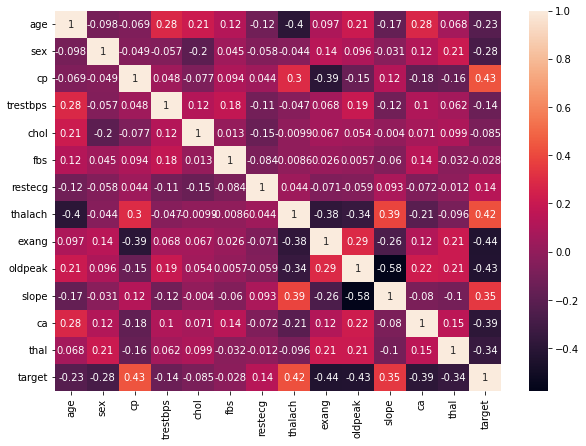

In [67]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

In [68]:
X = df.drop('target',axis=1)
y = df['target']

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.3,random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [70]:
from sklearn.linear_model import LogisticRegressionCV
log_model = LogisticRegressionCV()
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [71]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [72]:
from sklearn.metrics import confusion_matrix,classification_report

In [73]:
y_pred = log_model.predict(scaled_X_test)

In [74]:
confusion_matrix(y_pred,y_test)

array([[34,  4],
       [10, 43]], dtype=int64)

In [75]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        38
           1       0.91      0.81      0.86        53

    accuracy                           0.85        91
   macro avg       0.84      0.85      0.84        91
weighted avg       0.86      0.85      0.85        91

